### 1)  A cloth manufacturing company is interested to know about the segment or attributes causes high sale.  Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  

### Ans:

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("Company_Data.csv")
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB
None


In [5]:
print(df.isnull().sum())

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64


In [6]:
print(f"Duplicate rows: {df.duplicated().sum()}")

Duplicate rows: 0


In [7]:
print(df.describe())

            Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.650364  147.376436   
min      0.000000   77.000000   21.000000     0.000000   10.000000   
25%      5.390000  115.000000   42.750000     0.000000  139.000000   
50%      7.490000  125.000000   69.000000     5.000000  272.000000   
75%      9.320000  135.000000   91.000000    12.000000  398.500000   
max     16.270000  175.000000  120.000000    29.000000  509.000000   

            Price         Age   Education  
count  400.000000  400.000000  400.000000  
mean   115.795000   53.322500   13.900000  
std     23.676664   16.200297    2.620528  
min     24.000000   25.000000   10.000000  
25%    100.000000   39.750000   12.000000  
50%    117.000000   54.500000   14.000000  
75%    131.000000   66.000000   16.000000  
max    191.000000

In [8]:
print(df.dtypes)

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object


### Correlation Heatmap

C:\Users\Lenovo-PC\AppData\Local\Temp\ipykernel_10452\3680217239.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")


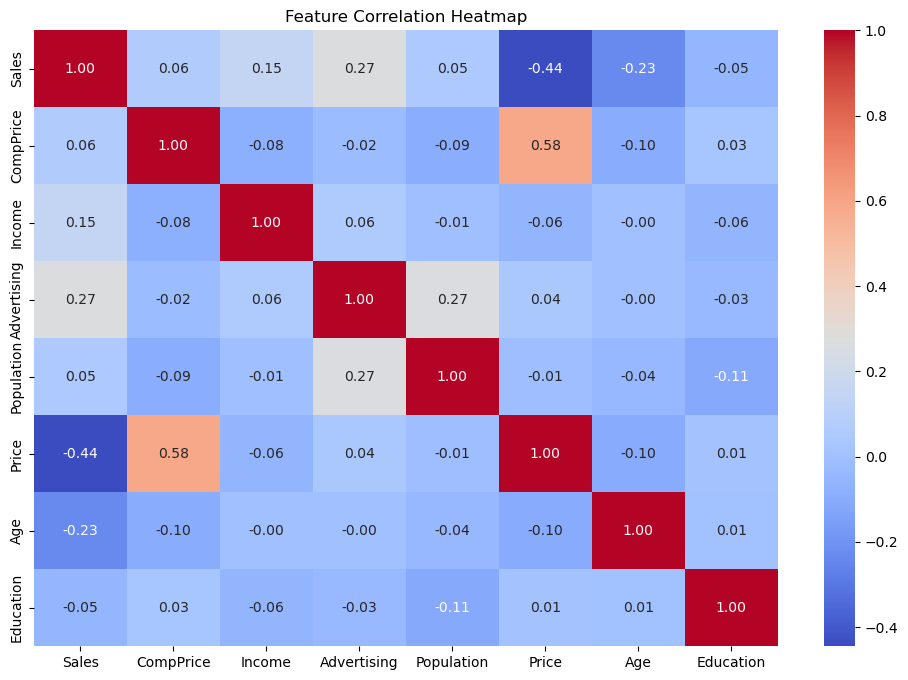

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


In [3]:
df['Sale_Category'] = pd.qcut(df['Sales'], q=3, labels=['Low', 'Medium', 'High'])


In [4]:
x = df.drop(['Sales', 'Sale_Category'], axis=1)
y = df['Sale_Category']

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x['ShelveLoc'] = le.fit_transform(x['ShelveLoc'])
x['Urban'] = le.fit_transform(x['Urban'])
x['US'] = le.fit_transform(x['US'])

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [8]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = 'entropy')
model.fit(x,y)
print(model.feature_importances_)

[0.18360756 0.1201592  0.08677459 0.08670248 0.19126416 0.14745128
 0.12690778 0.03243212 0.00315472 0.0215461 ]


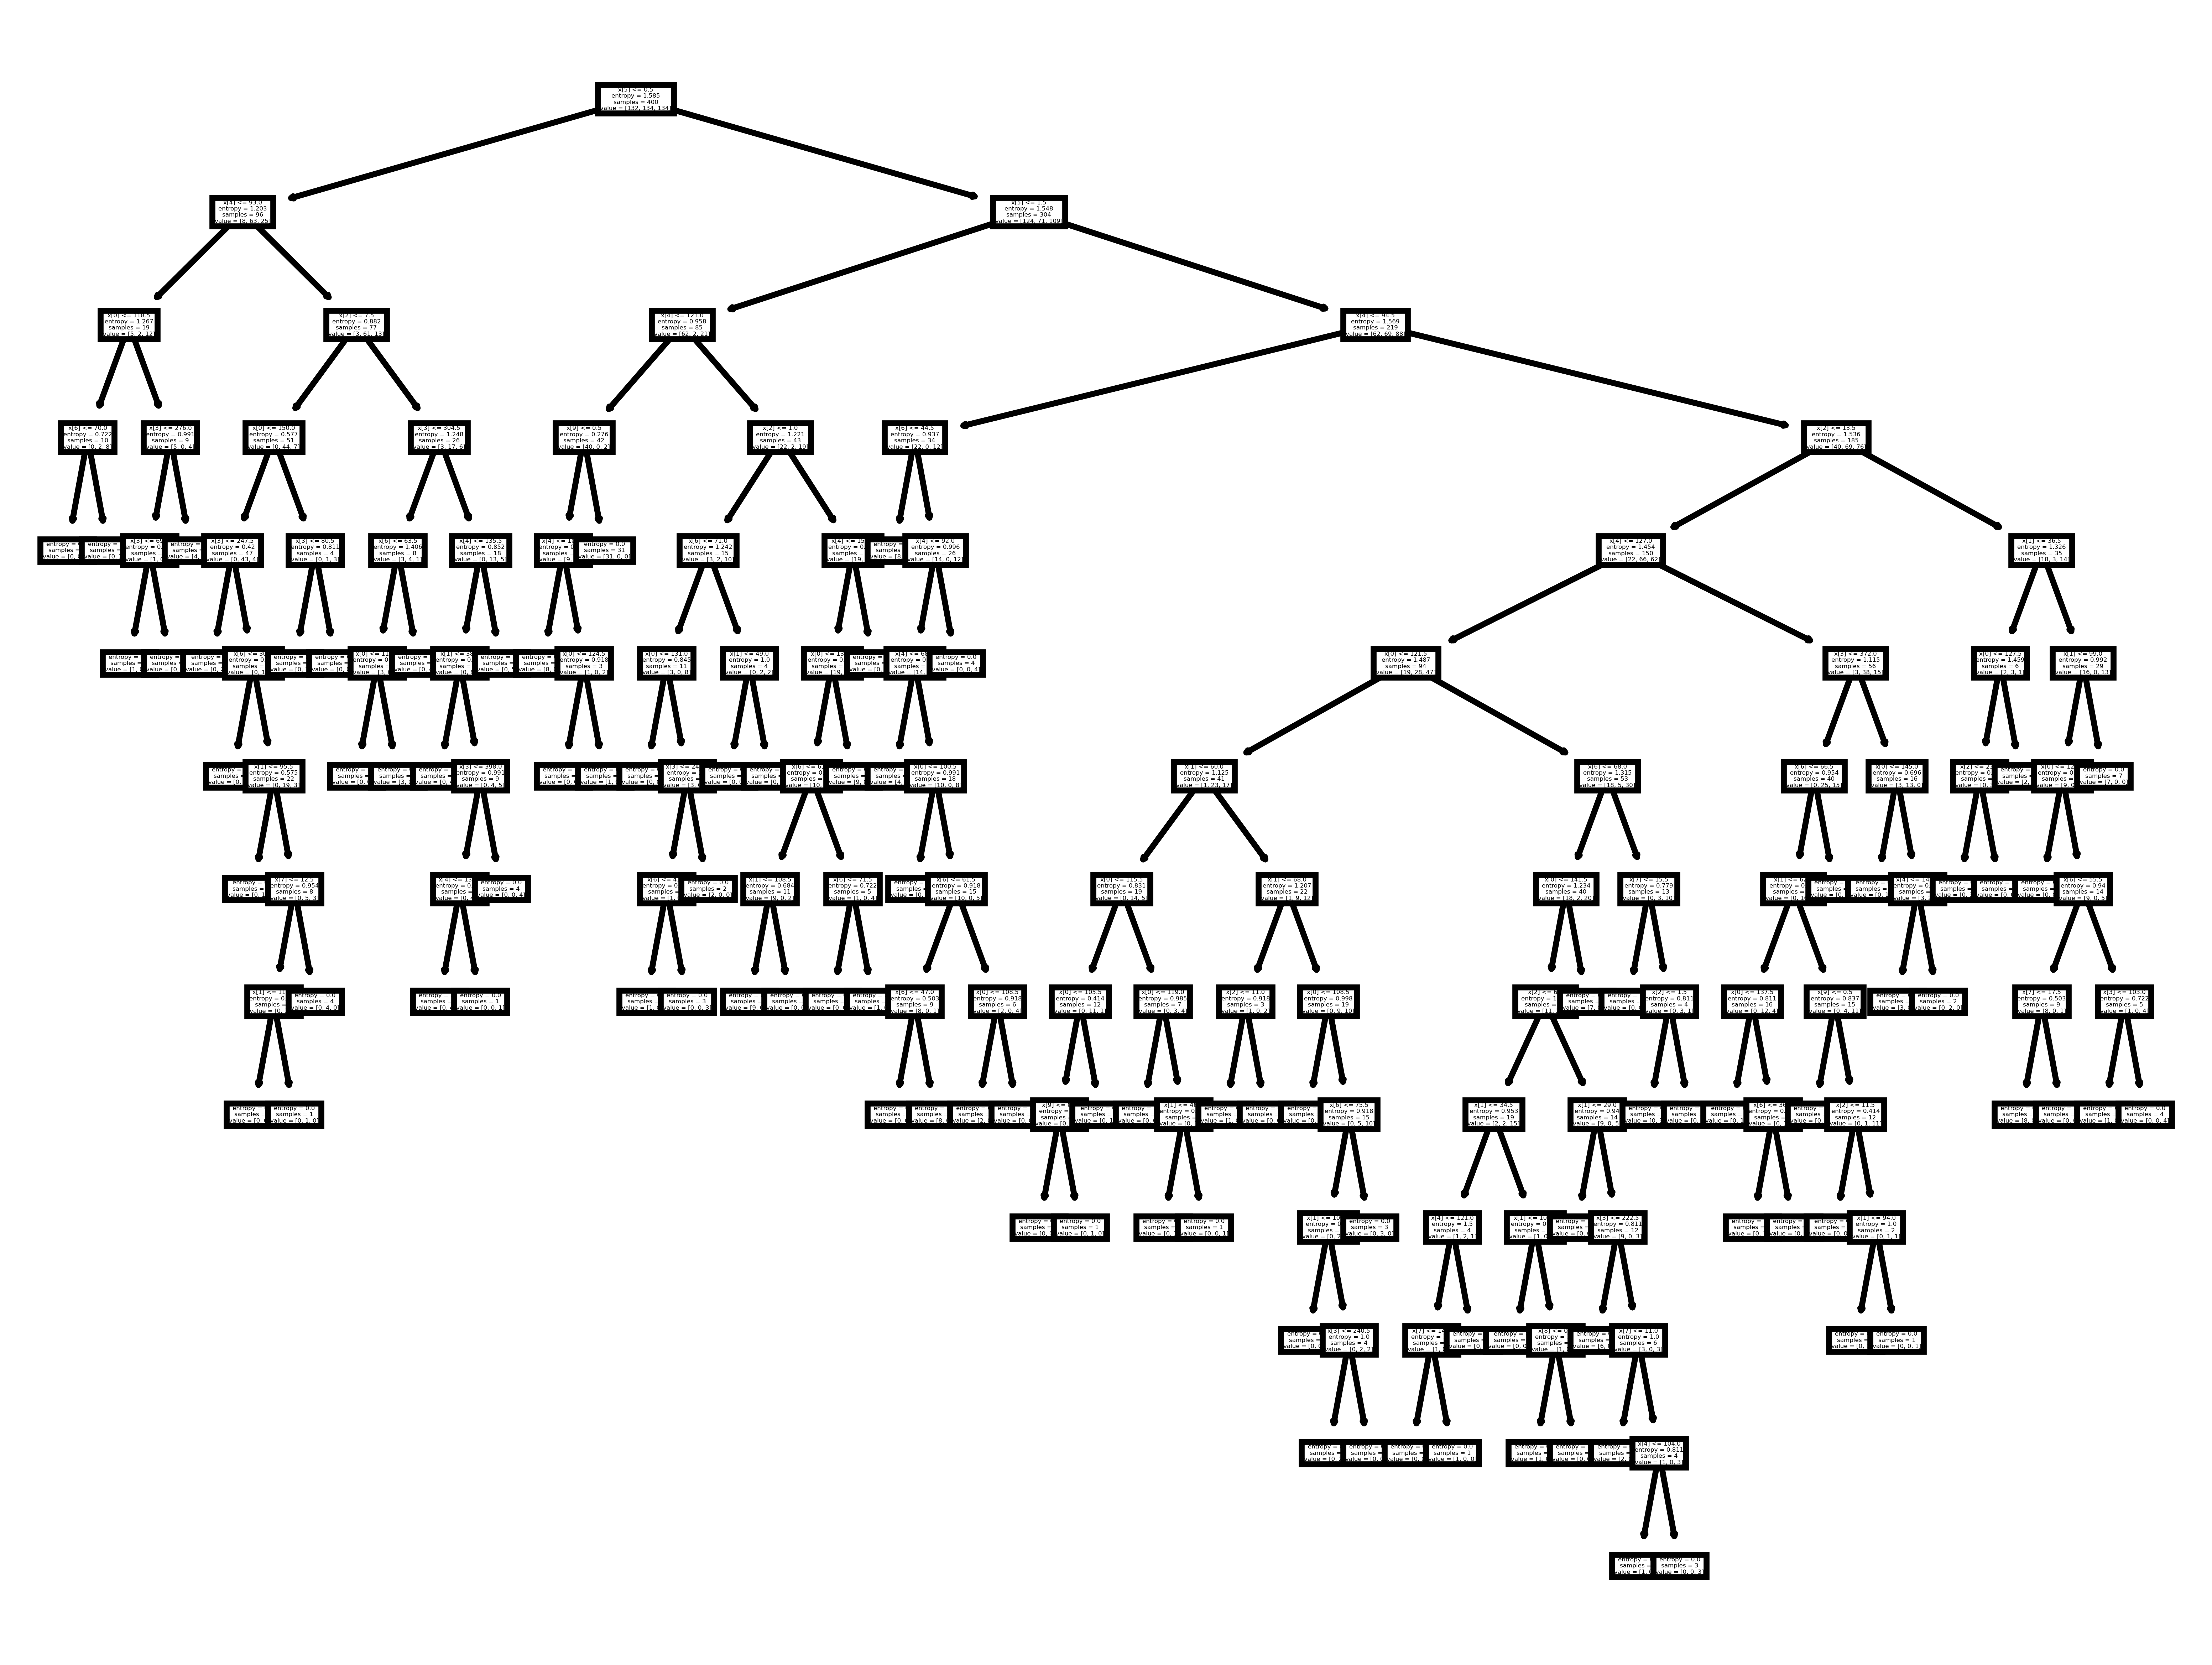

In [9]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(dpi=1200)
tree.plot_tree(model);

In [10]:
from sklearn.metrics import classification_report

In [11]:
preds = model.predict(x_test)
preds

array(['Low', 'Low', 'High', 'Low', 'High', 'Low', 'High', 'Medium',
       'High', 'High', 'Low', 'Medium', 'High', 'Low', 'High', 'High',
       'Medium', 'High', 'Medium', 'Low', 'Medium', 'High', 'Low', 'Low',
       'High', 'Medium', 'High', 'Medium', 'Medium', 'Low', 'High',
       'High', 'Low', 'Low', 'High', 'Low', 'Low', 'Medium', 'High',
       'Medium', 'Low', 'Medium', 'High', 'High', 'High', 'Low', 'Medium',
       'Medium', 'Low', 'Medium', 'High', 'Medium', 'Low', 'High', 'High',
       'Low', 'Low', 'High', 'High', 'Medium', 'High', 'High', 'Medium',
       'Low', 'Medium', 'Medium', 'High', 'Medium', 'Low', 'High', 'Low',
       'Low', 'High', 'Low', 'Medium', 'Medium', 'High', 'High', 'Low',
       'High'], dtype=object)

In [12]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

        High       1.00      1.00      1.00        32
         Low       1.00      1.00      1.00        26
      Medium       1.00      1.00      1.00        22

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [37]:
df1 = pd.read_csv("Fraud_check.csv")
df1.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [26]:
df1['Income_Category'] = pd.cut(df1['Taxable.Income'], bins=[0, 30000, float('inf')], labels=['Risky', 'Good'])

In [27]:
x = df1.drop(['Taxable.Income', 'Income_Category'], axis=1)
y = df1['Income_Category']

In [28]:
x['Undergrad'] = x['Undergrad'].map({'YES': 1, 'NO': 0})
x['Marital.Status'] = x['Marital.Status'].map({'Single': 0, 'Married': 1, 'Divorced': 2})
x['Urban'] = x['Urban'].map({'YES': 1, 'NO': 0})

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [30]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [31]:
y_pred = dt_model.predict(x_test)

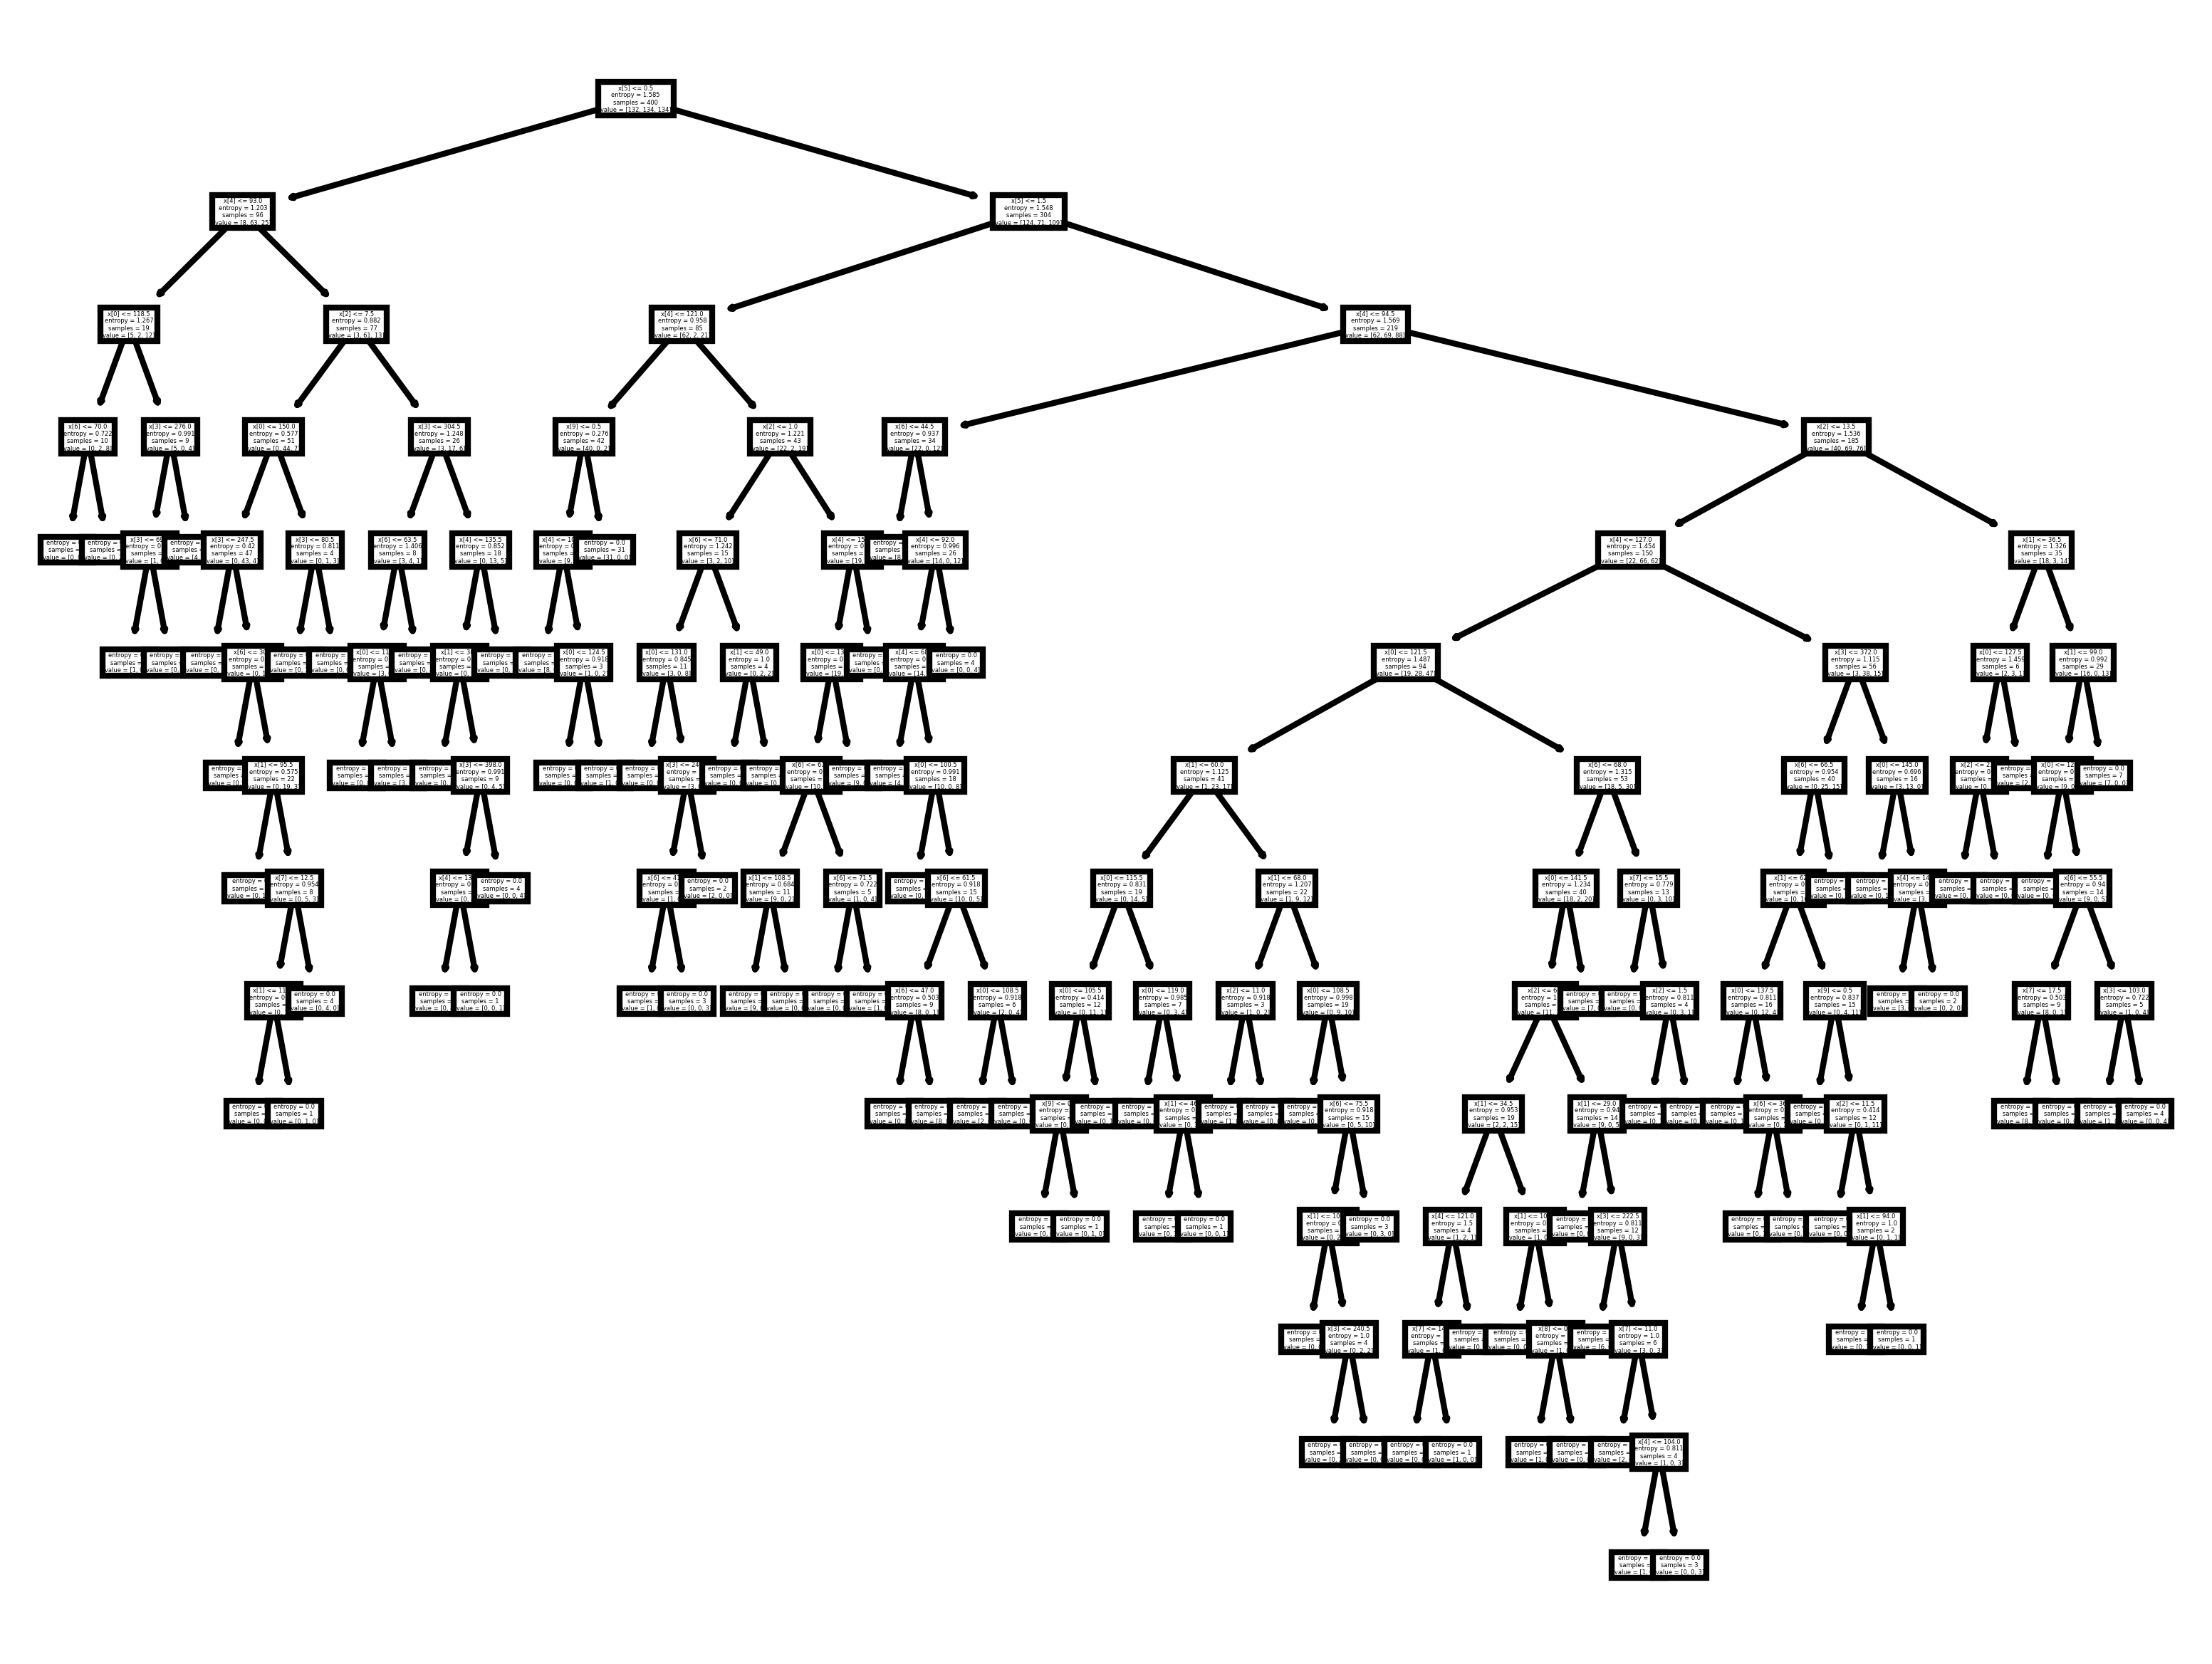

In [32]:
plt.figure(dpi=600)
tree.plot_tree(model);

In [33]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [34]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.6583333333333333

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        Good       0.78      0.78      0.78        94
       Risky       0.22      0.23      0.23        26

    accuracy                           0.66       120
   macro avg       0.50      0.50      0.50       120
weighted avg       0.66      0.66      0.66       120



In [36]:
print(confusion_matrix(y_test, y_pred))

[[73 21]
 [20  6]]
